#### Content:
+ Introduction
+ Data description 
+ Preprocessing techniques
+ Prediction models
+ Conclusion

### Data description
Our analysis will be based on determining the presence of heart disease in the patient.

- Age : age in years
- Sex : (1 = male; 0 = female)
- Cp : chest pain type (4 values)
- Trestbps : resting blood pressure (in mm Hg on admission to the hospital)
- Chol : serum cholestoral in mg/dl
- Fbs: fasting blood sugar (1 = true; 0 = false)
- Restecg : resting electrocardiographic results
- Thalach : maximum heart rate achieved
- Exang : exercise induced angina (1 = yes; 0 = no)
- Oldpeak : ST depression induced by exercise relative to rest
- Slope : the slope of the peak exercise ST segment
- Ca : number of major vessels (0-4) colored by flourosopy
- Thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

## Data gathering and processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# General info about data
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# The target column
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


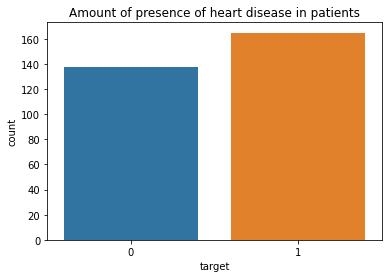

In [6]:
sns.countplot(df['target'])
plt.title('Amount of presence of heart disease in patients')
plt.show()

In [7]:
# Now we are separating data into X and y

X = df.drop('target', axis=1)
y = df['target']

In [8]:
# Dataset summary

X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [9]:
# Since the features are in different ranges, we need to scale them

scaled_X = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)

In [10]:
# Next we selecting best features for our model
# Since we are doing classification task, ANOVA method is more applicable

def selectBestFeatures(X, y):

    scores = []
    
    for i in tqdm(range(1, len(X.columns)+1)):
        select_k_best_classifier = SelectKBest(f_classif, k=i).fit(X, y)
        mask = select_k_best_classifier.get_support() #list of booleans
        selected_X = X[X.columns[mask]]
        
        X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.30, random_state=42)
        
        for n in range(3, 22, 2):
            model = KNeighborsClassifier(n_neighbors=n)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            scores.append([i, metrics.accuracy_score(y_test, y_pred), n])
        
    return scores

  0%|          | 0/13 [00:00<?, ?it/s]

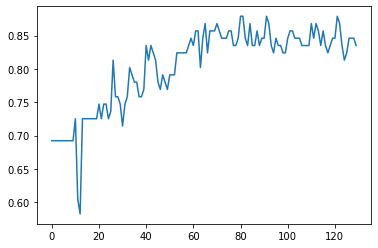

In [11]:
plt.plot(np.array(selectBestFeatures(X, y))[:, 1])
plt.show()

In [12]:
scores = selectBestFeatures(X, y)

optimal_k = scores[np.argmax(np.array(scores)[:, 1])][0]
optimal_n = scores[np.argmax(np.array(scores)[:, 1])][-1]

  0%|          | 0/13 [00:00<?, ?it/s]

In [13]:
select_k_best_classifier = SelectKBest(f_classif, k=optimal_k).fit(X, y)
mask = select_k_best_classifier.get_support() #list of booleans
X = X[X.columns[mask]]

In [14]:
# Now our data is ready

X

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


## Model training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
model = KNeighborsClassifier(n_neighbors=optimal_n)

# Train the model using the training sets
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Model evaluation

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8791208791208791


## Results

In [18]:
# Classification report
from sklearn.metrics import classification_report
print('Çlassification report:')
print('')

print(classification_report(y_test, y_pred))

Çlassification report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.91      0.86      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



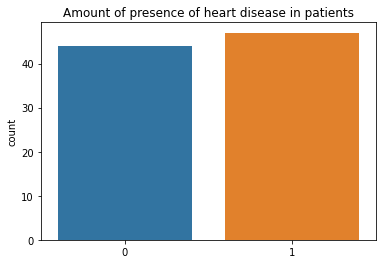

In [19]:
sns.countplot(x = y_pred)
plt.title('Amount of presence of heart disease in patients')
plt.show()

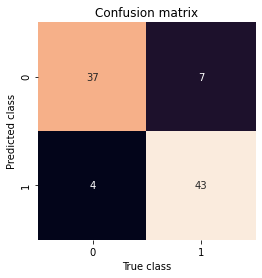

In [20]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_m = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_m.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.show()

## Conclusion

- After the implementation and the execution of the created machine learning model using the KNN Classifier algorithm, it could be clearly revealed that the predicted model for the heart diseases gives the best accuracy score as 87.91%.
- In addition, we think that the classification report and confusion matrix  clearly represented the accuracy scores and visualizations in detail for the predicted model.